## First part


In [85]:
import pandas as pd
import geopandas as gpd
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import tensorflow as tf


In [25]:
df=pd.read_csv("br-capes-btd-2021-2023-10-31.csv", encoding='ISO-8859-1', delimiter=';')

In [5]:
df_columns= pd.DataFrame(df.columns, columns=['Estados'])

In [4]:
df['DT_TITULACAO'].head(1)

0    30JUN2021:00:00:00
Name: DT_TITULACAO, dtype: object

In [5]:
df_columns

,Estados
0,AN_BASE
1,CD_PROGRAMA
2,NM_PROGRAMA
3,CD_ENTIDADE_CAPES
4,SG_ENTIDADE_ENSINO
5,NM_ENTIDADE_ENSINO
6,ID_ADD_PRODUCAO_INTELECTUAL
7,ID_PRODUCAO_INTELECTUAL
8,NM_PRODUCAO
9,ID_SUBTIPO_PRODUCAO


* Medidas tendencia central
* Boxplot
* Histograma
* Curtose, assimetria
* Variação intraclasse -> determinar correlação
* Variação interclasse -> determinar correlação
* Coeficiente de crammer -> variaveis categoricas


Grafico

* Grafico de linhas 
    - Numero de trabalhos publicados ao longo do tempo, cresce ou aumenta?
* Grafico de barras 
    - comparar as classes de trabalhos - áreas

* Grafico de bolhas - geográfico
* Mapas de calor para verificar quais as dias do ano mais pessoas defendem ao longo dos anos
* Tree map alternativa ao grafico de pizza
* Grafico de barras um do lado da outra para comparar defesa de mulheres e homens (2021,2022,2023)
* dados cíclicos - grafico radar
* Mapa cloroplético - 

correlações

- INVESTIMENTO FEDERAL em educação vs numero de pos graduandos
- 



### Trabalhos por estado 

In [6]:
df_grouped=pd.DataFrame(df.groupby('NM_UF_IES').size())
df_grouped = df_grouped.reset_index(names='Count')
df_grouped.columns = ['Estados', 'Count']

In [7]:
fig = px.bar(df_grouped.sort_values(by='Count', ascending=False), x='Estados', y='Count', title='Distribuição de trabalhos por estado')
fig.update_layout(yaxis_title='Count', xaxis_title='Estado')
fig.show()

In [40]:
shapefile_path = "BR_UF_2022/BR_UF_2022.shp"
gdf = gpd.read_file(shapefile_path)
gdf['centroid'] = gdf.geometry.centroid

gdf.head(30)

/tmp/ipykernel_3757449/4091591602.py:3: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




,CD_UF,NM_UF,SIGLA_UF,NM_REGIAO,AREA_KM2,geometry,centroid
0,12,Acre,AC,Norte,164173.429,"POLYGON ((-68.79282 -10.99957, -68.79367 -10.9...",POINT (-70.47293 -9.21327)
1,13,Amazonas,AM,Norte,1559255.881,"POLYGON ((-56.76292 -3.23221, -56.76789 -3.242...",POINT (-64.65345 -4.15411)
2,15,Pará,PA,Norte,1245870.704,"MULTIPOLYGON (((-48.97548 -0.19834, -48.97487 ...",POINT (-53.07149 -3.98042)
3,16,Amapá,AP,Norte,142470.762,"MULTIPOLYGON (((-51.04561 -0.05088, -51.05422 ...",POINT (-51.96202 1.44746)
4,17,Tocantins,TO,Norte,277423.627,"POLYGON ((-48.2483 -13.19239, -48.24844 -13.19...",POINT (-48.3313 -10.14808)
5,21,Maranhão,MA,Nordeste\n,329651.496,"MULTIPOLYGON (((-44.5868 -2.23341, -44.58696 -...",POINT (-45.28777 -5.07221)
6,22,Piauí,PI,Nordeste\n,251755.481,"POLYGON ((-42.47034 -3.48377, -42.46126 -3.484...",POINT (-42.97045 -7.3893)
7,23,Ceará,CE,Nordeste\n,148894.447,"POLYGON ((-37.87162 -4.3664, -37.87109 -4.3670...",POINT (-39.61579 -5.09322)
8,24,Rio Grande do Norte,RN,Nordeste\n,52809.599,"MULTIPOLYGON (((-35.18728 -5.78987, -35.18707 ...",POINT (-36.67327 -5.8398)
9,25,Paraíba,PB,Nordeste\n,56467.242,"MULTIPOLYGON (((-34.7958 -7.175, -34.79578 -7....",POINT (-36.83246 -7.12104)


In [41]:
df_sg=pd.DataFrame(df.groupby('SG_UF_IES').size())
df_sg = df_sg.reset_index(names='Count')
df_sg.columns = ['SIGLA_UF', 'Count']
df_sg.head()

,SIGLA_UF,Count
0,AC,215
1,AL,676
2,AM,860
3,AP,139
4,BA,3045


In [42]:
gdf_joined = gdf.merge(df_sg, how="left", on="SIGLA_UF")
gdf.head(30)

,CD_UF,NM_UF,SIGLA_UF,NM_REGIAO,AREA_KM2,geometry,centroid
0,12,Acre,AC,Norte,164173.429,"POLYGON ((-68.79282 -10.99957, -68.79367 -10.9...",POINT (-70.47293 -9.21327)
1,13,Amazonas,AM,Norte,1559255.881,"POLYGON ((-56.76292 -3.23221, -56.76789 -3.242...",POINT (-64.65345 -4.15411)
2,15,Pará,PA,Norte,1245870.704,"MULTIPOLYGON (((-48.97548 -0.19834, -48.97487 ...",POINT (-53.07149 -3.98042)
3,16,Amapá,AP,Norte,142470.762,"MULTIPOLYGON (((-51.04561 -0.05088, -51.05422 ...",POINT (-51.96202 1.44746)
4,17,Tocantins,TO,Norte,277423.627,"POLYGON ((-48.2483 -13.19239, -48.24844 -13.19...",POINT (-48.3313 -10.14808)
5,21,Maranhão,MA,Nordeste\n,329651.496,"MULTIPOLYGON (((-44.5868 -2.23341, -44.58696 -...",POINT (-45.28777 -5.07221)
6,22,Piauí,PI,Nordeste\n,251755.481,"POLYGON ((-42.47034 -3.48377, -42.46126 -3.484...",POINT (-42.97045 -7.3893)
7,23,Ceará,CE,Nordeste\n,148894.447,"POLYGON ((-37.87162 -4.3664, -37.87109 -4.3670...",POINT (-39.61579 -5.09322)
8,24,Rio Grande do Norte,RN,Nordeste\n,52809.599,"MULTIPOLYGON (((-35.18728 -5.78987, -35.18707 ...",POINT (-36.67327 -5.8398)
9,25,Paraíba,PB,Nordeste\n,56467.242,"MULTIPOLYGON (((-34.7958 -7.175, -34.79578 -7....",POINT (-36.83246 -7.12104)


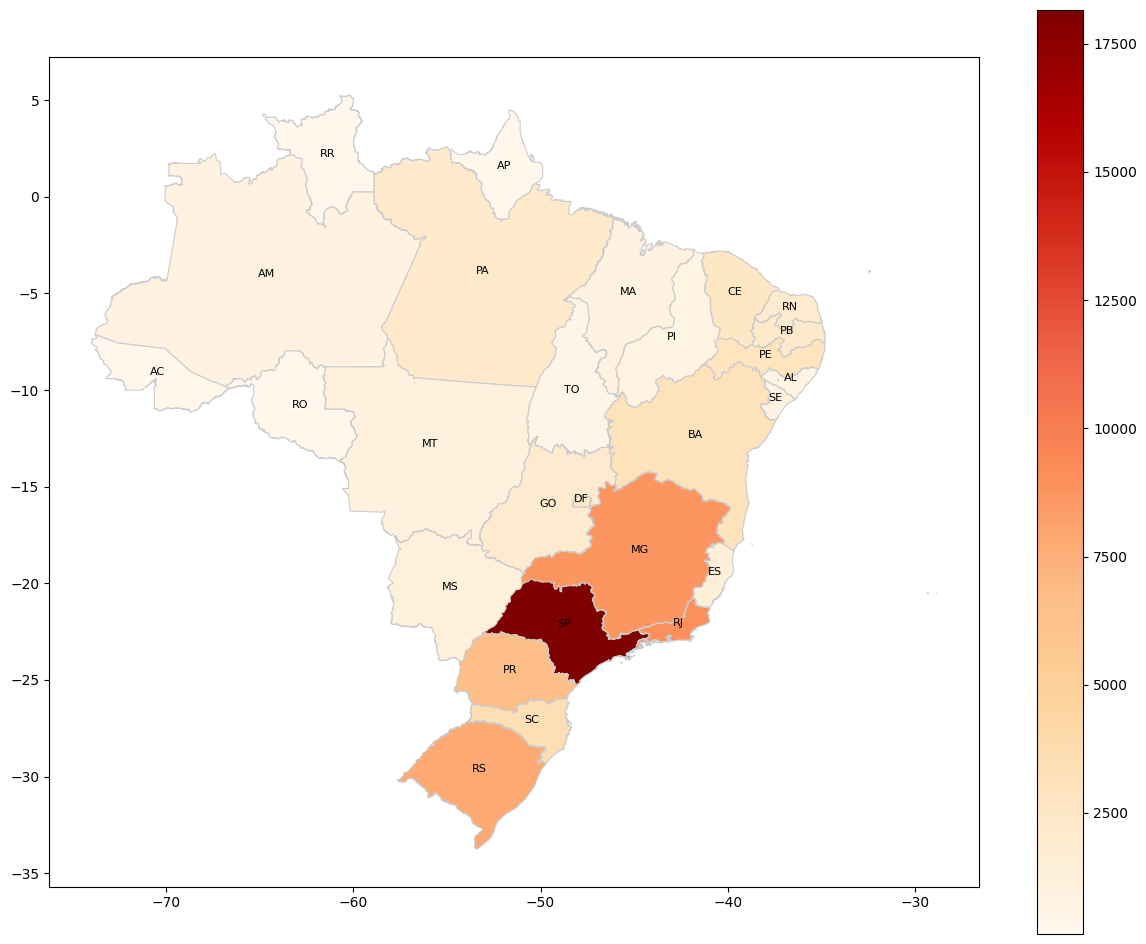

In [44]:
fig, ax = plt.subplots(1, 1, figsize=(15, 12))
gdf_joined.plot(column="Count", cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

for idx, row in gdf.iterrows():
    ax.text(row["centroid"].x, row["centroid"].y, row["SIGLA_UF"], fontsize=8, ha='center')

plt.show()

In [12]:
bar_height=20
margin_height=40
chart_height=(bar_height*len(df_grouped['Estados'])) + margin_height

df_grouped_sorted = df_grouped.sort_values(by='Count')

fig = go.Figure(go.Bar(
    x= df_grouped_sorted['Count'],
    y=df_grouped_sorted['Estados'],
    orientation='h'
))

fig.update_layout(
    title='Distribuição de trabalhos por estado',
    xaxis_title='Estado',
    yaxis_title='Número de trabalhos',
    height= chart_height,
    margin=dict(t=50,b=50)
)

fig.show()

### Distribuição por área de conhecimento

In [13]:
df_grouped_areas_con=df.groupby('NM_GRANDE_AREA_CONHECIMENTO').size()

In [14]:
df_grouped_areas_con.head()

NM_GRANDE_AREA_CONHECIMENTO
CI�NCIAS AGR�RIAS              7139
CI�NCIAS BIOL�GICAS            4335
CI�NCIAS DA SA�DE             12563
CI�NCIAS EXATAS E DA TERRA     6442
CI�NCIAS HUMANAS              14011
dtype: int64

In [15]:
df_grouped_areas_con= df_grouped_areas_con.reset_index()
df_grouped_areas_con.columns= ['Area_conhecimento', 'Count']

In [16]:
df_grouped_areas_con.head()

,Area_conhecimento,Count
0,CI�NCIAS AGR�RIAS,7139
1,CI�NCIAS BIOL�GICAS,4335
2,CI�NCIAS DA SA�DE,12563
3,CI�NCIAS EXATAS E DA TERRA,6442
4,CI�NCIAS HUMANAS,14011


In [17]:
fig = px.bar(df_grouped_areas_con.sort_values(by='Count', ascending=False), x='Area_conhecimento', y='Count', title='Histograma Vertical')
fig.update_layout(yaxis_title='Count', xaxis_title='Area_conhecimento')
fig.show()

In [18]:
colors = px.colors.qualitative.Pastel
fig2 = go.Figure(data=[go.Pie(labels=df_grouped_areas_con['Area_conhecimento'], values=df_grouped_areas_con['Count'], hole=0.4, marker=dict(colors=colors))])
fig2.show()

### Distribuição temporal

In [19]:
from datetime import datetime


In [20]:
df['DT_TITULACAO'] = df['DT_TITULACAO'].apply(lambda x: datetime.strptime(x,'%d%b%Y:%H:%M:%S'))

In [21]:
df['DT_TITULACAO'] = df['DT_TITULACAO'].apply(lambda x: datetime.strftime(x,'%d%m%Y'))

In [22]:
df.groupby('DT_TITULACAO')

## Processamento de Linguagem Natural

In [53]:
import nltk
from nltk.tokenize import word_tokenize
from pathlib import Path

resumo_df = df[["DS_RESUMO","NM_GRANDE_AREA_CONHECIMENTO"]]
resumo_df.columns = ["resumo", "area"]
resumo_df['tokens'] = resumo_df["resumo"].apply(lambda x: word_tokenize(x))

resumo_df.head()

,resumo,area,tokens
0,O TERRIT�RIO AMAZ�NICO � RECONHECIDO PELA SUA ...,MULTIDISCIPLINAR,"[O, TERRIT�RIO, AMAZ�NICO, �, RECONHECIDO, PEL..."
1,A RELA��O ENTRE O HOMEM E AS PLANTAS FOI ESTAB...,MULTIDISCIPLINAR,"[A, RELA��O, ENTRE, O, HOMEM, E, AS, PLANTAS, ..."
2,A UTILIZA��O DE MICRO-ORGANISMOS ENDOF�TICOS C...,MULTIDISCIPLINAR,"[A, UTILIZA��O, DE, MICRO-ORGANISMOS, ENDOF�TI..."
3,OS FUNGOS FILAMENTOSOS S�O CONSIDERADOS BOAS F...,MULTIDISCIPLINAR,"[OS, FUNGOS, FILAMENTOSOS, S�O, CONSIDERADOS, ..."
4,A MAL�RIA � UMA DAS DOEN�AS MAIS FATAIS QUE AF...,MULTIDISCIPLINAR,"[A, MAL�RIA, �, UMA, DAS, DOEN�AS, MAIS, FATAI..."


In [58]:
stopwords = {word.strip() for word in set(Path("stopwords.txt").read_text().split("\n"))}
stopwords

{'a',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'estamos',
 'estas',
 'estava',
 'estavam',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéramos',
 'estivéssemos',
 'estou',
 'está',
 'estávamos',
 'estão',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fui',
 'fôramos',
 'fôssemos',
 'haja',
 'hajam',
 'hajamos',
 'havemos',
 'havia',
 'hei',
 'houve',
 'houvemos',
 'houver',
 'houvera',
 'houveram',
 'houverei',
 'houverem',
 'houveremos',
 'houveria',
 'houveriam',
 'houvermos',
 'houverá',
 'houverão',
 'houveríamos',
 'h

In [59]:
resumo_df["filtered"] = resumo_df["tokens"].apply(lambda x: " ".join([word for word in x if word.lower() not in stopwords]))
resumo_df.head()

,resumo,area,tokens,filtered
0,O TERRIT�RIO AMAZ�NICO � RECONHECIDO PELA SUA ...,MULTIDISCIPLINAR,"[O, TERRIT�RIO, AMAZ�NICO, �, RECONHECIDO, PEL...",TERRIT�RIO AMAZ�NICO � RECONHECIDO GRANDE BIOD...
1,A RELA��O ENTRE O HOMEM E AS PLANTAS FOI ESTAB...,MULTIDISCIPLINAR,"[A, RELA��O, ENTRE, O, HOMEM, E, AS, PLANTAS, ...",RELA��O HOMEM PLANTAS ESTABELECIDA DESDE PRIM�...
2,A UTILIZA��O DE MICRO-ORGANISMOS ENDOF�TICOS C...,MULTIDISCIPLINAR,"[A, UTILIZA��O, DE, MICRO-ORGANISMOS, ENDOF�TI...",UTILIZA��O MICRO-ORGANISMOS ENDOF�TICOS FONTE ...
3,OS FUNGOS FILAMENTOSOS S�O CONSIDERADOS BOAS F...,MULTIDISCIPLINAR,"[OS, FUNGOS, FILAMENTOSOS, S�O, CONSIDERADOS, ...",FUNGOS FILAMENTOSOS S�O CONSIDERADOS BOAS FONT...
4,A MAL�RIA � UMA DAS DOEN�AS MAIS FATAIS QUE AF...,MULTIDISCIPLINAR,"[A, MAL�RIA, �, UMA, DAS, DOEN�AS, MAIS, FATAI...",MAL�RIA � DOEN�AS FATAIS AFETA HUMANIDADE . DU...


In [61]:
resumo_df['area'].unique()

array(['MULTIDISCIPLINAR'], dtype=object)

In [60]:
import wordcloud

output = Path("results")
output.mkdir(parents=True, exist_ok=True)

grouped_area = resumo_df.groupby("area")["filtered"].apply(' '.join).reset_index()

for index, row in grouped_area.iterrows():

    filename = output / f"{row['area']}.png"

    word = wordcloud.WordCloud(width=800, height=400, background_color="white", stopwords=stopwords).generate(row['filtered'])

    word.to_file(filename)


## Usando berts para categorizar


In [101]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization
from sklearn.model_selection import train_test_split
import shutil
import random

In [27]:
df.groupby(['NM_GRANDE_AREA_CONHECIMENTO']).size()

NM_GRANDE_AREA_CONHECIMENTO
CIÊNCIAS AGRÁRIAS               7139
CIÊNCIAS BIOLÓGICAS             4335
CIÊNCIAS DA SAÚDE              12563
CIÊNCIAS EXATAS E DA TERRA      6442
CIÊNCIAS HUMANAS               14011
CIÊNCIAS SOCIAIS APLICADAS     12377
ENGENHARIAS                     7580
LINGÜÍSTICA, LETRAS E ARTES     5380
MULTIDISCIPLINAR               12411
dtype: int64

In [28]:
data = df[['DS_ABSTRACT','CD_GRANDE_AREA_CONHECIMENTO' ] ]

In [29]:
data = data.rename(columns={'DS_ABSTRACT': 'X', 'CD_GRANDE_AREA_CONHECIMENTO': 'Y'})

In [30]:
data['X'].head()

0    THE AMAZON TERRITORY IS RECOGNIZED FOR ITS GRE...
1    THE RELATIONSHIP BETWEEN HUMANITY AND PLANTS H...
2    DUE TO THEIR VERSATILE METABOLITES, THE USE OF...
3    FILAMENTOUS FUNGI ARE CONSIDERED GOOD SOURCES ...
4    MALARIA IS ONE OF THE MOST FATAL DISEASES AFFE...
Name: X, dtype: object

In [74]:
data_shuffled = data.sample(frac=1, random_state=42).reset_index(drop=True).dropna()  # frac=1 means shuffle all data


In [75]:
train_size = int(0.8 * len(data_shuffled))

In [91]:
df_train_val = data_shuffled[:train_size]  # Training set (80%)
df_test = data_shuffled[train_size:] 

In [92]:
df_train= df_train_val[:train_size]
df_val = df_train_val[train_size:]

In [78]:
# X_train_val, X_test, y_train_val, y_test = train_test_split(df['X'], df['Y'], test_size=0.2, random_state=42)

# x_train, x_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

In [79]:
AUTOTUNE = tf.data.AUTOTUNE
batch_size = 32
seed = 42

In [93]:
X = df_train['X'].str.replace(r'[^A-Za-z0-9\s]+', '', regex=True)
Y = df_train['Y'].values
df_val = df_val['X'].str.replace(r'[^A-Za-z0-9\s]+', '', regex=True)
df_test = df_test['X'].str.replace(r'[^A-Za-z0-9\s]+', '', regex=True)






In [82]:
vectorizer = tf.keras.layers.TextVectorization(max_tokens=30000, output_sequence_length=100)


In [83]:
vectorizer.adapt(X)


In [84]:
train_ds = tf.data.Dataset.from_tensor_slices((X, Y))

In [86]:
def vectorize_text(text, label):
    text = tf.expand_dims(text, -1)  # Expand dims to add an extra dimension for the vectorizer
    return vectorizer(text), label

In [87]:
dataset = tf.data.Dataset.from_tensor_slices((X, Y))

In [88]:
vectorized_ds = dataset.map(vectorize_text)


In [89]:
vectorized_ds = vectorized_ds.batch(32).prefetch(buffer_size=tf.data.AUTOTUNE)


In [96]:
for text_batch, label_batch in vectorized_ds.take(1):
    for i in range(1):
        print(f"Abstract: {text_batch.numpy()[1]}")
        label=label_batch.numpy()[i]
        print(f"label: {label}")

Abstract: [[    2  4350  1385   515    16     2    94  3624  4920    14  1153   109
      2  2453     3  2253 15354  1487  6970  2964     8     2     1     1
      4  4912  3806    16     2  2376 11308  4920     2  4350  1385  3136
    110 11941  1249   555     4  1721     2   555 10566    45     7  2654
      2  4350  1385   515    16     2    94  3624  4920    14  1153   109
      2  2453     3  2253 15354  1487  6970  2964     8     2     1     1
      4  4912  3806    16     2  2376 11308  4920     2  4350  1385  3136
    110 11941  1249   555     4  1721     2   555 10566    45     7 12731
   8189     3  1603     4]]
label: 40000001


2024-10-21 21:17:00.966064: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [102]:
#@title ##Escolher um modelo BERT pré-treinado (TensorFlow Hub)

map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
    'electra_small':
        'https://tfhub.dev/google/electra_small/2',
    'electra_base':
        'https://tfhub.dev/google/electra_base/2',
    'experts_pubmed':
        'https://tfhub.dev/google/experts/bert/pubmed/2',
    'experts_wiki_books':
        'https://tfhub.dev/google/experts/bert/wiki_books/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
}

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/3',
    'electra_small':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'electra_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_pubmed':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_wiki_books':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

bert_model_name = 'small_bert/bert_en_uncased_L-4_H-512_A-8'
#bert_model_name = 'small_bert/bert_en_uncased_L-2_H-128_A-2'

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'modelo BERT selecionado           : {tfhub_handle_encoder}')
print(f'Modelo de pré-processamento auto-selecionado: {tfhub_handle_preprocess}')

modelo BERT selecionado           : https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Modelo de pré-processamento auto-selecionado: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


In [105]:
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)